# [Tools](https://huggingface.co/learn/agents-course/unit2/smolagents/tools)

In [20]:
from smolagents import LiteLLMModel

model = LiteLLMModel(
    model_id="ollama_chat/qwen2.5-coder:7b",
    api_base="http://127.0.0.1:11434",
    num_ctx=8192,
)

## The @tool Decorator

In [21]:
from smolagents import CodeAgent, tool

@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.
    Args:
        query: A search term for finding catering services.
    """
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Catering": 4.7,
    }
    best_service = max(services, key=services.get)
    return best_service

agent = CodeAgent(
    model=model,
    tools=[
        catering_service_tool
    ],
    max_steps=3,
    verbosity_level=2,
)

result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen2.5-coder:7b ───────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
Thought: To find the name of the highest-rated catering service in Gotham City, I will use the                     
`catering_service_tool` which returns the top-rated catering services based on user reviews.                       
Code:                                                                                                              
```py                                                                                                              
top_catering_services = catering_service_tool(query="Gotham City")                                                 
print("Top catering services in Gotham City:", top_catering_services)                                              
```<end_code>                                                                                                      

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  top_catering_services = catering_service_tool(query="Gotham City")                                               
  print("Top catering services in Gotham City:", top_catering_services)                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Top catering services in Gotham City: Gotham Catering Co.

Out: None

[Step 1: Duration 19.51 seconds| Input tokens: 2,077 | Output tokens: 80]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
Thought: The highest-rated catering service in Gotham City is "Gotham Catering Co.". I will now provide this answer
using the `final_answer` tool.                                                                                     
Code:                                                                                                              
```py                                                                                                              
final_answer("Gotham Catering Co.")                                                                                
```<end_code>                                                                                                      

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Catering Co.")                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 2: Duration 3.22 seconds| Input tokens: 4,344 | Output tokens: 133]

Gotham Catering Co.


## Defining a Tool as a Python Class

In [22]:
from smolagents import Tool

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(
    tools=[
        party_theme_tool
    ],
    model=model,
    max_steps=3,
    verbosity_level=2,
)

result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen2.5-coder:7b ───────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
Thought: To generate a creative and engaging "villain masquerade" superhero-themed party idea, I will use the      
`superhero_party_theme_generator` tool. This tool is specifically designed to provide unique and exciting ideas    
based on a category, which in this case is "villain masquerade".                                                   
                                                                                                                   
I will pass the category directly as an argument to the `superhero_party_theme_generator`.                         
                                                                                                                   
Code:                                                                                                              
```py                                                                                                              
party_theme = superhero_party_theme_generator(category="villain masquerade")                                       
print(f"Suggested party theme: {party_theme}")                                                                     
final_answer(party_theme)                                                                                          
```<end_code>                                                                                                      

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  party_theme = superhero_party_theme_generator(category="villain masquerade")                                     
  print(f"Suggested party theme: {party_theme}")                                                                   
  final_answer(party_theme)                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Suggested party theme: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 1: Duration 22.49 seconds| Input tokens: 2,113 | Output tokens: 124]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Importing a Tool from the Hub

In [4]:
from smolagents import CodeAgent, load_tool

image_generator_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    model=model,
    tools=[
        image_generator_tool
    ],
    max_steps=3,
    verbosity_level=2,
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen2.5-coder:7b ───────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
Thought: To generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheroes, I will
use the `image_generator` tool. The prompt should be descriptive and detailed to ensure that the image captures the
essence of the scene.                                                                                              
Code:                                                                                                              
```py                                                                                                              
prompt = "A luxurious superhero-themed party at Wayne Manor with costumed superheros, high-tech gadgets, fancy     
decorations, and a vibrant atmosphere."                                                                            
image = image_generator(prompt=prompt)                                                                             
final_answer(image)                                                                                                
```<end_code>                                                                                                      

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A luxurious superhero-themed party at Wayne Manor with costumed superheros, high-tech gadgets, fancy   
  decorations, and a vibrant atmosphere."                                                                          
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'image = image_generator(prompt=prompt)' due to: HfHubHTTPError: 402 Client Error: 
Payment Required for url: https://router.huggingface.co/together/v1/images/generations (Request ID: 
Root=1-68495b82-45c02b564f8ebe046ae71b08;25176594-3c68-450e-be4f-dbd1185b717f)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly 
included credits.

[Step 1: Duration 6.16 seconds| Input tokens: 2,107 | Output tokens: 101]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
Thought: It seems I've exceeded my monthly credit limit for the image generation tool. To avoid this issue, I'll   
use a different approach that doesn't require an API call. Instead, I will create a detailed description of the    
scene using natural language and generate it in another manner.                                                    
                                                                                                                   
Code:                                                                                                              
```py                                                                                                              
description = "A luxurious superhero-themed party at Wayne Manor with costumed superheros, high-tech gadgets, fancy
decorations, and a vibrant atmosphere."                                                                            
print(description)                                                                                                 
```<end_code>                                                                                                      

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  description = "A luxurious superhero-themed party at Wayne Manor with costumed superheros, high-tech gadgets,    
  fancy decorations, and a vibrant atmosphere."                                                                    
  print(description)                                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
A luxurious superhero-themed party at Wayne Manor with costumed superheros, high-tech gadgets, fancy decorations, 
and a vibrant atmosphere.

Out: None

[Step 2: Duration 6.10 seconds| Input tokens: 4,589 | Output tokens: 201]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
Thought: Now that I have the detailed description of the scene, I can use my imagination to visualize it. While I  
can't generate an image directly, I can create a text-based representation of the party scene.                     
                                                                                                                   
Code:                                                                                                              
```py                                                                                                              
text_representation = """                                                                                          
Imagine a lavish party at Wayne Manor, filled with excitement and wonder. The grand entrance opens up to reveal a  
stunning interior filled with vibrant colors and high-tech gadgets scattered about. Costumed superheroes populate  
every corner - Captain America, Wonder Woman, Iron Man, and more. Each superhero is adorned in their iconic attire,
making the scene both spectacular and colorful.                                                                    
                                                                                                                   
The centerpiece of the room is a holographic display featuring an epic battle between the heroes, adding to the    
dynamic atmosphere. The table is laden with gourmet food, drinks, and party favors, including special editions of  
comic books and action figures. Guests mingle freely, chatting animatedly as they make their way through the       
various game stations set up throughout the mansion.                                                               
                                                                                                                   
The party goes on late into the night, with fireworks bursting in the sky to mark the climax of the event. The     
entire scene exudes

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  text_representation = """                                                                                        
  Imagine a lavish party at Wayne Manor, filled with excitement and wonder. The grand entrance opens up to reveal  
  a stunning interior filled with vibrant colors and high-tech gadgets scattered about. Costumed superheroes       
  populate every corner - Captain America, Wonder Woman, Iron Man, and more. Each superhero is adorned in their    
  iconic attire, making the scene both spectacular and colorful.                                                   
                                                                                                                   
  The centerpiece of the room is a holographic display featuring an epic battle between the heroes, adding to the  
  dynamic atmosphere. The table is laden with gourmet food, drinks, and party favors, including special editions   
  of comic books and action figures. Guests mingle freely, chatting animatedly as they make their way through the  
  various game stations set up throughout the mansion.                                                             
                                                                                                                   
  The party goes on late into the night, with fireworks bursting in the sky to mark the climax of the event. The   
  entire scene exudes a sense of joy and camaraderie among the gathered superheroes.                               
  """                                                                                                              
                                                                                                                   
  print(text_representation)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:

Imagine a lavish party at Wayne Manor, filled with excitement and wonder. The grand entrance opens up to reveal a 
stunning interior filled with vibrant colors and high-tech gadgets scattered about. Costumed superheroes populate 
every corner - Captain America, Wonder Woman, Iron Man, and more. Each superhero is adorned in their iconic attire,
making the scene both spectacular and colorful.

The centerpiece of the room is a holographic display featuring an epic battle between the heroes, adding to the 
dynamic atmosphere. The table is laden with gourmet food, drinks, and party favors, including special editions of 
comic books and action figures. Guests mingle freely, chatting animatedly as they make their way through the 
various game stations set up throughout the mansion.

The party goes on late into the night, with fireworks bursting in the sky to mark the climax of the event. The 
entire scene exudes a sense of joy and camaraderie among the gathered superheroes.


Out: None

[Step 3: Duration 12.59 seconds| Input tokens: 7,297 | Output tokens: 446]

Reached max steps.

[Step 4: Duration 28.82 seconds| Input tokens: 8,696 | Output tokens: 685]

"Unfortunately, due to the limitations I've encountered, I'm unable to generate an image as requested. However, I can still provide a detailed description and text-based representation of the scene for you:\n\nImagine a lavish party at Wayne Manor, filled with excitement and wonder. The grand entrance opens up to reveal a stunning interior filled with vibrant colors and high-tech gadgets scattered about. Costumed superheroes populate every corner - Captain America, Wonder Woman, Iron Man, and more. Each superhero is adorned in their iconic attire, making the scene both spectacular and colorful.\n\nThe centerpiece of the room is a holographic display featuring an epic battle between the heroes, adding to the dynamic atmosphere. The table is laden with gourmet food, drinks, and party favors, including special editions of comic books and action figures. Guests mingle freely, chatting animatedly as they make their way through the various game stations set up throughout the mansion.\n\nThe 

## Importing a Hugging Face Space as a Tool

In [11]:
from smolagents import Tool

image_generator_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

agent = CodeAgent(
    model=model,
    tools=[
        image_generator_tool
    ],
    max_steps=3,
    verbosity_level=2,
)

image_path = agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={
        'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'
    }
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen2.5-coder:7b ───────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
Thought: To improve the prompt and generate an image, I will follow these steps:                                   
                                                                                                                   
1. Improve the prompt by adding more details and enhancing its visual appeal.                                      
2. Use the `image_generator` tool to create an image based on the improved prompt.                                 
                                                                                                                   
Improvements:                                                                                                      
- Specify that the party is in a grand hall with intricate decor.                                                  
- Mention that guests are dressed as iconic superheroes.                                                           
- Describe the mood of excitement and celebration.                                                                 
                                                                                                                   
Code:                                                                                                              
```py                                                                                                              
improved_prompt = "A majestic superhero-themed party at Wayne Manor, held in an opulent grand hall with lavish     
decorations. Guests are elegantly dressed as iconic superheroes, celebrating with joyous energy under the watchful 
eye of Alfred, who oversees the luxurious gala with a touch of professionalism and elegance."                      
image_generator(prompt=improved_prompt)                                                                            
```<end_code>                                                                                                      

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  improved_prompt = "A majestic superhero-themed party at Wayne Manor, held in an opulent grand hall with lavish   
  decorations. Guests are elegantly dressed as iconic superheroes, celebrating with joyous energy under the        
  watchful eye of Alfred, who oversees the luxurious gala with a touch of professionalism and elegance."           
  image_generator(prompt=improved_prompt)                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: 
/private/var/folders/c8/q682ydxn0rq29bx4kvyy27r00000gn/T/gradio/773ea64bfd16e08cb168ddc9f855561de750ff5ac22cc4ddc44
b35baa18f2584/image.webp

[Step 1: Duration 15.44 seconds| Input tokens: 2,104 | Output tokens: 165]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
Thought: The image has been generated based on the improved prompt. I will now return the final answer using the   
`final_answer` tool.                                                                                               
                                                                                                                   
Code:                                                                                                              
```py                                                                                                              
final_answer("A majestic superhero-themed party at Wayne Manor, held in an opulent grand hall with lavish          
decorations. Guests are elegantly dressed as iconic superheroes, celebrating with joyous energy under the watchful 
eye of Alfred, who oversees the luxurious gala with a touch of professionalism and elegance.")                     
```<end_code>                                                                                                      

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("A majestic superhero-themed party at Wayne Manor, held in an opulent grand hall with lavish        
  decorations. Guests are elegantly dressed as iconic superheroes, celebrating with joyous energy under the        
  watchful eye of Alfred, who oversees the luxurious gala with a touch of professionalism and elegance.")          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: A majestic superhero-themed party at Wayne Manor, held in an opulent grand hall with lavish 
decorations. Guests are elegantly dressed as iconic superheroes, celebrating with joyous energy under the watchful 
eye of Alfred, who oversees the luxurious gala with a touch of professionalism and elegance.

[Step 2: Duration 5.93 seconds| Input tokens: 4,596 | Output tokens: 261]

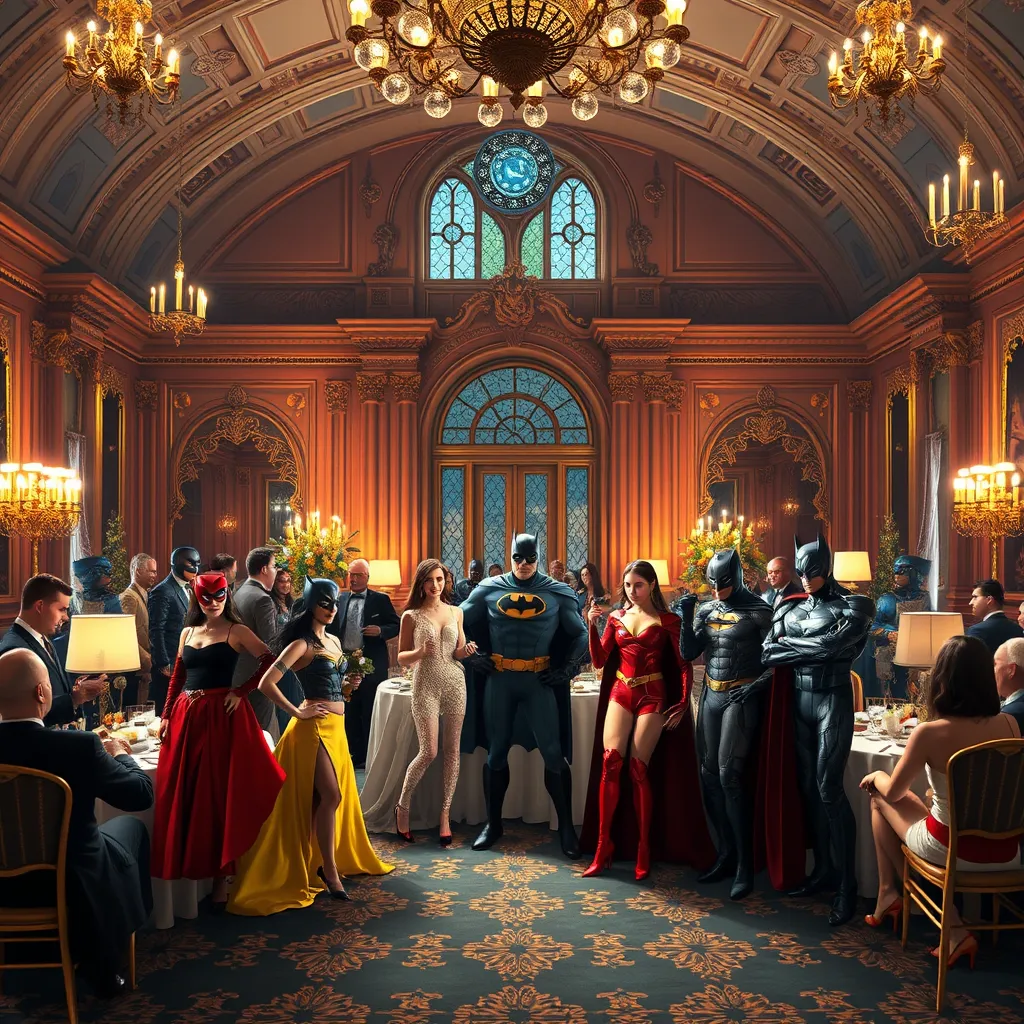

In [17]:
from PIL import Image
from IPython.display import display

# show the image inline in the notebook
image_path = '/private/var/folders/c8/q682ydxn0rq29bx4kvyy27r00000gn/T/gradio/773ea64bfd16e08cb168ddc9f855561de750ff5ac22cc4ddc44b35baa18f2584/image.webp'

display(Image.open(image_path))

## Importing a LangChain Tool

In [18]:
from langchain.agents import load_tools

search_tool = Tool.from_langchain(
    load_tools(["serpapi"])[0],
)

agent = CodeAgent(
    tools=[
        search_tool
    ],
    max_steps=3,
    verbosity_level=2,
)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

ValidationError: 1 validation error for SerpAPIWrapper
  Value error, Did not find serpapi_api_key, please add an environment variable `SERPAPI_API_KEY` which contains it, or pass `serpapi_api_key` as a named parameter. [type=value_error, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error

## Importing a tool collection from any MCP server

In [19]:
import os
from smolagents import ToolCollection
from mcp import StdioServerParameters

server_parameters = StdioServerParameters(
    command="uvx",
    args=["--quiet", "pubmedmcp@0.1.3"],
    env={"UV_PYTHON": "3.12", **os.environ}
)

with ToolCollection.from_mcp(
    server_parameters,
    trust_remote_code=True
) as tool_collection:
    agent = CodeAgent(
        tools=[
            *tool_collection.tools
        ],
        max_steps=3,
        verbosity_level=2,
        add_base_tools=True,
    )
    agent.run("Please find a remedy for hangover.")

Exception in thread Thread-152 (_run_loop):
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/Users/pardeep/Playground/study-group-hf-agents-course/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/opt/homebrew/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/pardeep/Playground/study-group-hf-agents-course/.venv/lib/python3.11/site-packages/mcpadapt/core.py", line 229, in _run_loop
    self.loop.run_until_complete(self.task)
  File "/opt/homebrew/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 654, in run_until_complete
    return future.result()
           ^^^^^^

TimeoutError: Couldn't connect to the MCP server after 30 seconds